Reg No.: 200968008<br>
Name: Aaron Dsouza<br>
<h1><b>Representational Learning using Autoencoders</b></h1>

#Use the Fashion MNIST data set and train a basic autoencoderto reconstruct images.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

from keras.models import Model
from keras.layers import Dense, Input, Flatten
from PIL import Image 

In [2]:
# Loading Datasets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


**Reshaping the Data**

In [3]:
# Reshaping the input data
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [4]:
print("X_Train Shape: "+str(x_train.shape))
print("Y_Train Shape: "+str(y_train.shape))

X_Train Shape: (60000, 784)
Y_Train Shape: (60000,)


In [5]:
print("X_Test Shape: "+str(x_test.shape))
print("Y_Test Shape: "+str(y_test.shape))

X_Test Shape: (10000, 784)
Y_Test Shape: (10000,)


**Normalizing the Data**

In [6]:
# Normalizing the data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

**Building the Autoencoder Model**

In [23]:
# Building the Autoencoder Model
input = Input(shape=(784,),name="Input Layer")

enc1 = Dense(196, activation='relu',name="Encoder_1")(input)
enc2 = Dense(64, activation='relu',name="Encoder_2")(enc1) # This is the latent layer
dec1 = Dense(196, activation='relu',name="Encoder_3")(enc2)
dec2 = Dense(784, activation='sigmoid',name="Encoder_4")(dec1)

autoencoder = Model(input,dec2)

autoencoder.compile(optimizer='Adam', loss='mse');

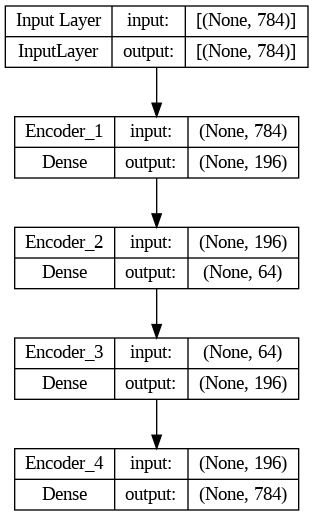

In [22]:
keras.utils.plot_model(autoencoder, show_shapes=True)

In [9]:
# Fitting the Model
history = autoencoder.fit(x_train,x_train,
                          epochs=10,
                          batch_size = 256,
                          validation_data = (x_test,x_test)
                          )

Epoch 1/10
235/235 [==============================] - 7s 20ms/step - loss: 0.3563 - val_loss: 0.3081
Epoch 2/10
235/235 [==============================] - 5s 19ms/step - loss: 0.2983 - val_loss: 0.2949
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.2897 - val_loss: 0.2895
Epoch 4/10
235/235 [==============================] - 8s 36ms/step - loss: 0.2851 - val_loss: 0.2855
Epoch 5/10
235/235 [==============================] - 7s 28ms/step - loss: 0.2821 - val_loss: 0.2842
Epoch 6/10
235/235 [==============================] - 5s 20ms/step - loss: 0.2798 - val_loss: 0.2809
Epoch 7/10
235/235 [==============================] - 5s 20ms/step - loss: 0.2781 - val_loss: 0.2794
Epoch 8/10
235/235 [==============================] - 5s 19ms/step - loss: 0.2765 - val_loss: 0.2781
Epoch 9/10
235/235 [==============================] - 5s 20ms/step - loss: 0.2756 - val_loss: 0.2772
Epoch 10/10
235/235 [==============================] - 5s 19ms/step - loss: 0.2745 - val_lo

**Plotting Training Loss Vs Validation Loss**

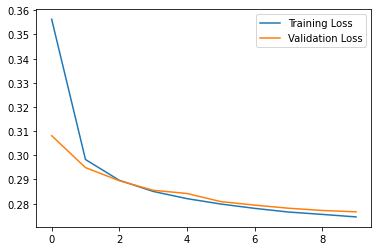

In [10]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [11]:
# Predicting for Test Data
preds = autoencoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


## Reconstructing the Test images

Original Images

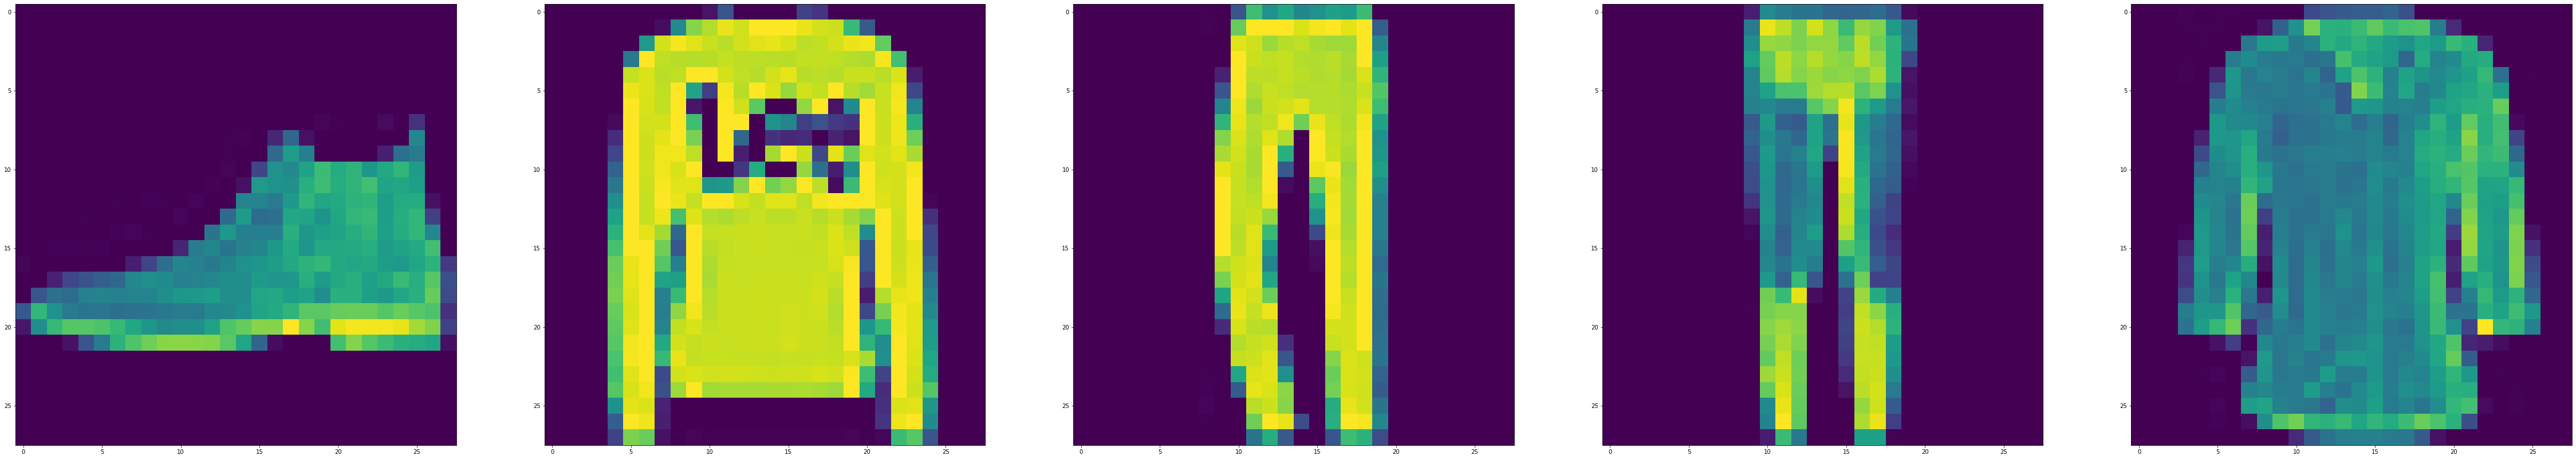

In [12]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(x_test[i].reshape(28, 28))
plt.show()

Reconstructed Images

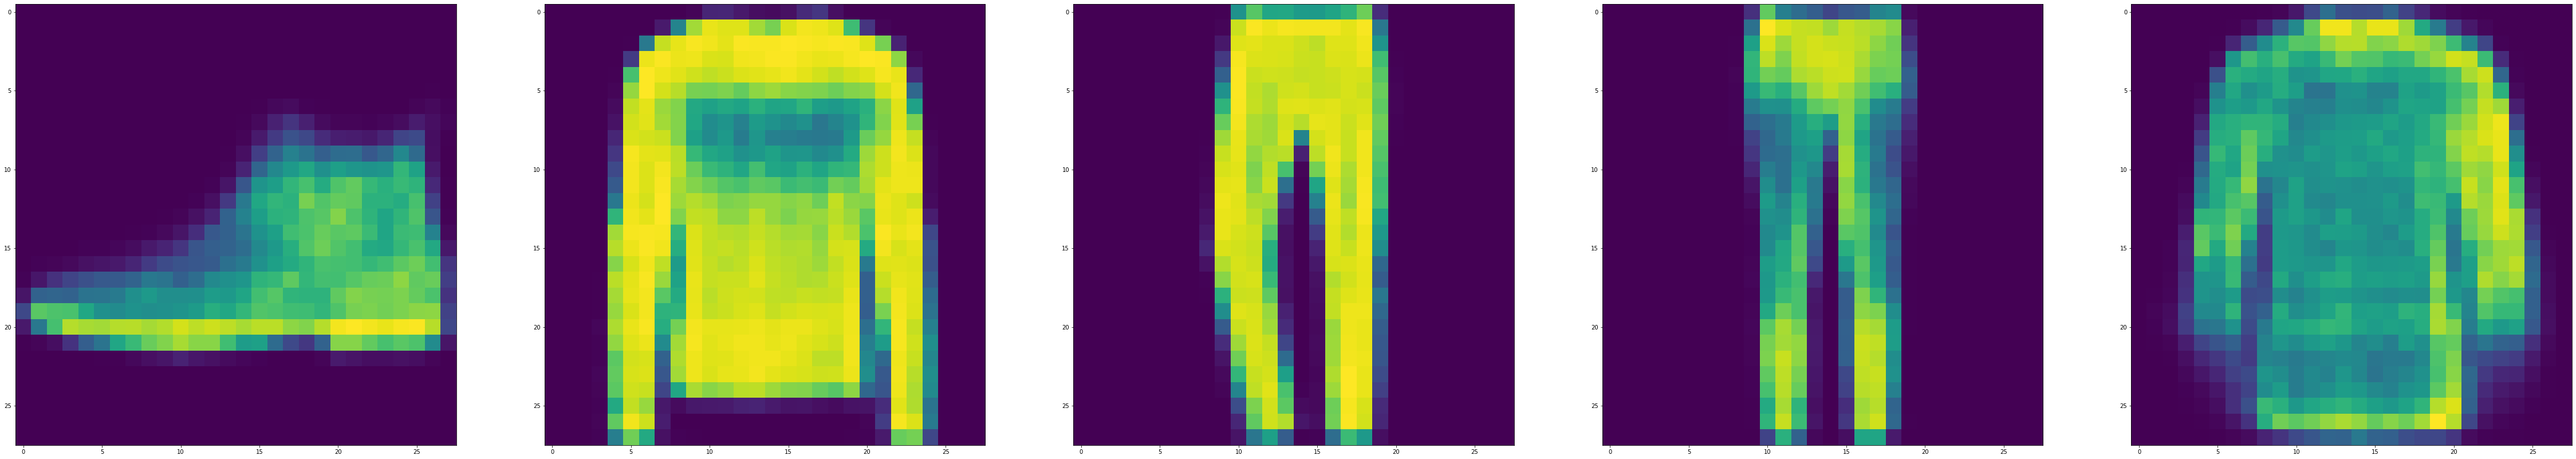

In [20]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

## Visualizing Intermidiate Steps in Autocoder

**Encoder**

In [28]:
# Building the Encoder Model
encoder = Model(input,enc2)
encoder.compile(optimizer='Adam', loss='mse');

 **Latent Features**

313/313 [==============================] - 1s 2ms/step


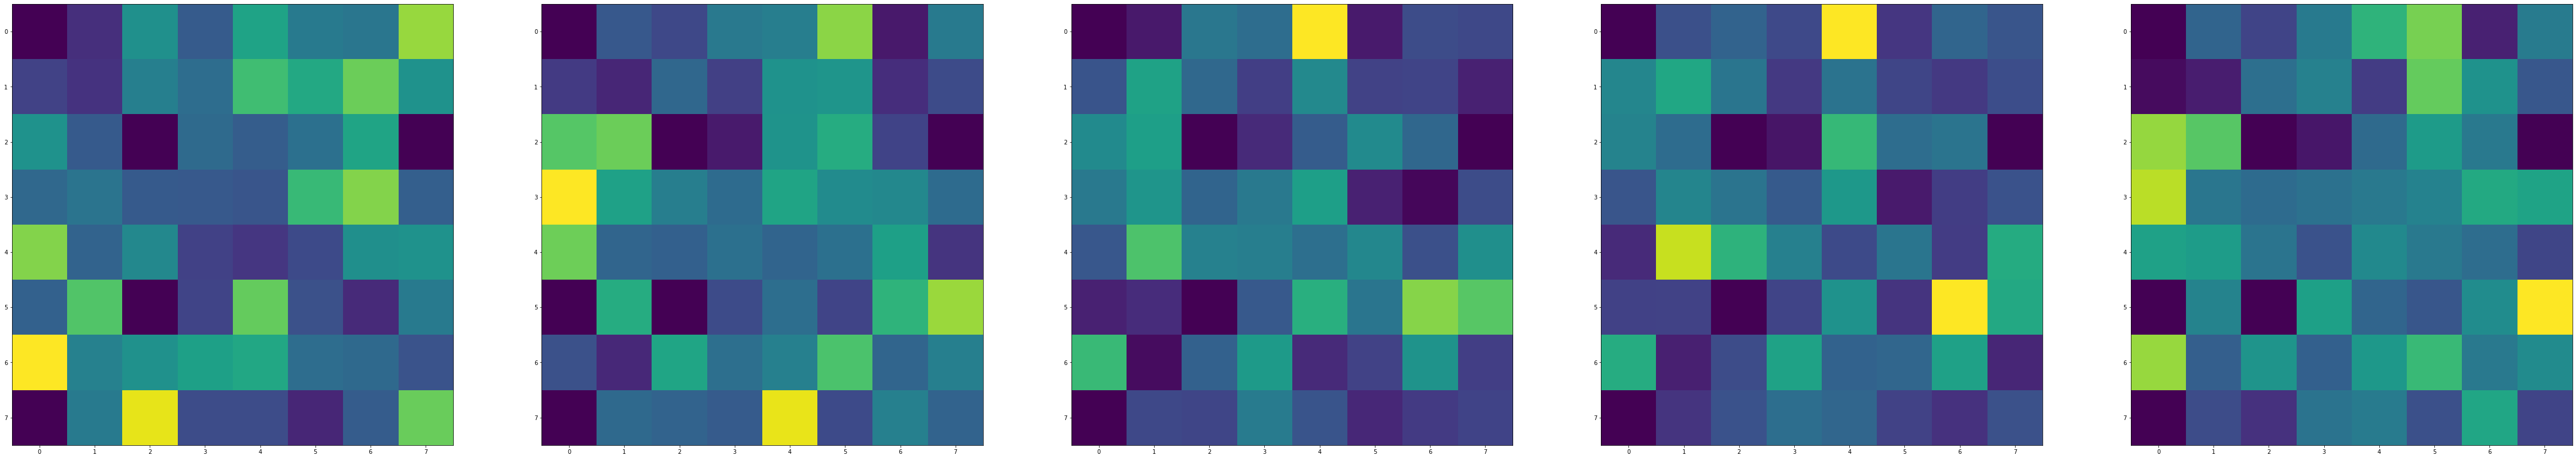

In [29]:
latent_feat = encoder.predict(x_test)
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(latent_feat[i].reshape(8, 8))
plt.show()

 **Decoder**

In [35]:
# Building the Decoder Model
decoder = Model(enc2,dec2)
decoder.compile(optimizer='Adam', loss='mse');                    )

#### Reconstructed Image

313/313 [==============================] - 1s 2ms/step


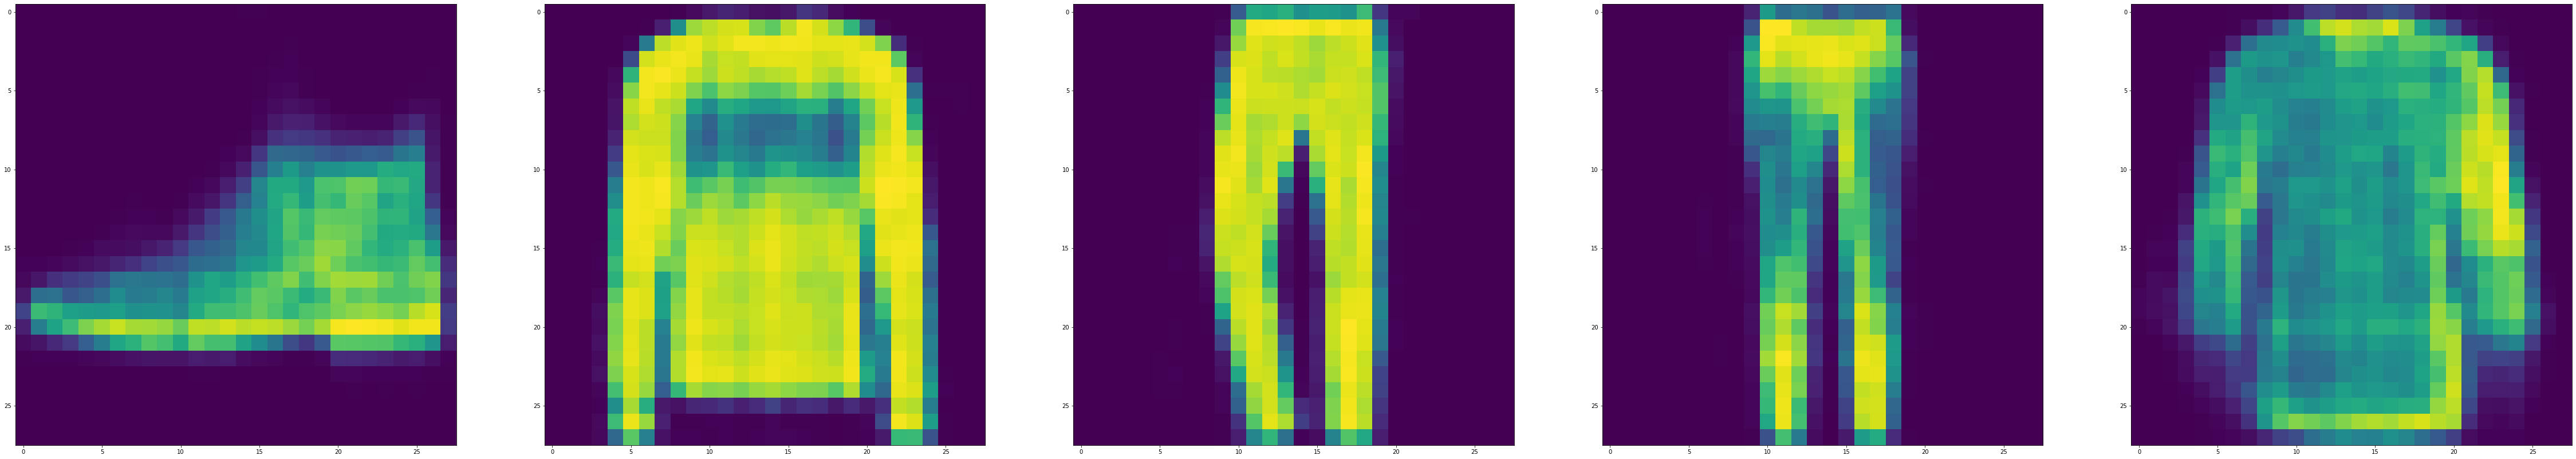

In [36]:
reconstructed_image = decoder.predict(latent_feat)
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(reconstructed_image[i].reshape(28, 28))
plt.show()

<ul>
<li>The Encoder is able to Reconstruct the images to a certain extent</li>
<li>For futher improving the model performance, we need large dataset of higher dimensional images</li>
</ul>